# Adaline & Delta Rule (Widrow & Hoff, 1960)

---

## Description
The **Adaline** (Adaptive Linear Neuron) is a model introduced by Widrow & Hoff in 1960.  
Unlike the perceptron, which uses a step function for binary outputs, Adaline produces a **continuous-valued output** based on the weighted sum of inputs.  

Mathematically:

$$
y = \sum_{i=1}^n w_i x_i + b
$$

where:
- \( x_i \): input features  
- \( w_i \): weights  
- \( b \): bias  

The output is then compared to the target, and the **error** is used to update weights.

---

## Delta Rule (LMS Rule)
Weight updates are performed using the **Least Mean Squares (LMS)** or **Delta Rule**, which applies gradient descent to minimize the squared error:

$$
\Delta w_i = \eta \, (t - y) \, x_i
$$

where:
- \( \eta \): learning rate  
- \( t \): target output  
- \( y \): predicted output  
- \( x_i \): input feature  

This update moves the weights in the direction that reduces the error between the prediction and the target.

---

## Relevance
- Introduced **gradient-based optimization** for neural networks.  
- Provided a more stable and mathematically grounded alternative to the perceptron learning rule.  
- Marked one of the first steps toward modern supervised learning and backpropagation.  

---

## Connection
- **Extension of Perceptron**: Adaline can handle **continuous-valued outputs**, not just binary states.  
- **Link to Markov Models**: Just as Markov models evolve probabilistically from one state to another, Adaline updates weights **incrementally and locally** using current error signals.  

---

## Summary
- **Adaline (1960)** = Linear neuron with continuous output.  
- **Delta Rule (LMS)** = Gradient descent weight update minimizing squared error.  
- **Impact**: Brought optimization into neural learning, paving the way for modern gradient-based deep learning.  


In [ ]:
# ===========================================================
# PyTorch Lab: Adaline & Delta Rule (1960)
# -----------------------------------------------------------
# Description: Linear unit trained with gradient descent (LMS rule).
# Relevance: Introduced optimization for weight updates.
# Connection: Early continuous-valued extension of discrete Markov-like models.
# ===========================================================

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -----------------------------
# Adaline Model
# -----------------------------
class Adaline(nn.Module):
    def __init__(self, n_inputs):
        super().__init__()
        self.linear = nn.Linear(n_inputs, 1, bias=True)

    def forward(self, x):
        return self.linear(x)  # continuous output (no step function)

# -----------------------------
# Training Function
# -----------------------------
def train_adaline(model, X, y, lr=0.1, epochs=50):
    criterion = nn.MSELoss()  # squared error loss
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    return losses

In [ ]:
# -----------------------------
# Visualization: Decision Boundary
# -----------------------------
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 200),
                            torch.linspace(y_min, y_max, 200), indexing="ij")
    grid = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim=1)
    with torch.no_grad():
        Z = model(grid)
        Z = torch.where(Z >= 0.5, 1.0, 0.0).reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y.view(-1).numpy(), cmap="bwr", edgecolor="k", s=150)
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()


In [ ]:
# -----------------------------
# Dataset: Logic Gates
# -----------------------------
X = torch.tensor([[0.,0.],
                  [0.,1.],
                  [1.,0.],
                  [1.,1.]])
y_and = torch.tensor([[0.],[0.],[0.],[1.]])
y_or  = torch.tensor([[0.],[1.],[1.],[1.]])
y_xor = torch.tensor([[0.],[1.],[1.],[0.]])



Epoch 0, Loss: 1.5575
Epoch 10, Loss: 0.1138
Epoch 20, Loss: 0.0865
Epoch 30, Loss: 0.0742
Epoch 40, Loss: 0.0683


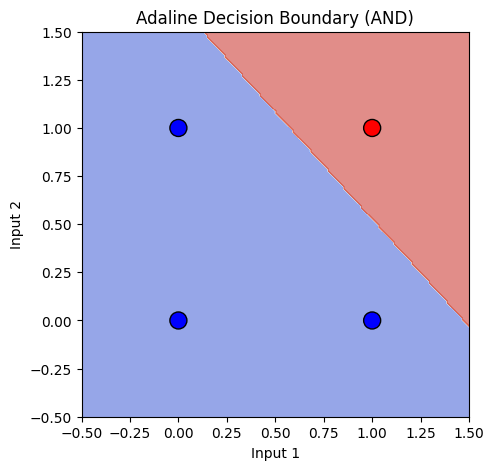

In [ ]:
# -----------------------------
# Train on AND
# -----------------------------
adaline_and = Adaline(2)
losses_and = train_adaline(adaline_and, X, y_and, lr=0.1, epochs=50)
plot_decision_boundary(adaline_and, X, y_and, "Adaline Decision Boundary (AND)")



Epoch 0, Loss: 0.9127
Epoch 10, Loss: 0.0933
Epoch 20, Loss: 0.0776
Epoch 30, Loss: 0.0701
Epoch 40, Loss: 0.0664


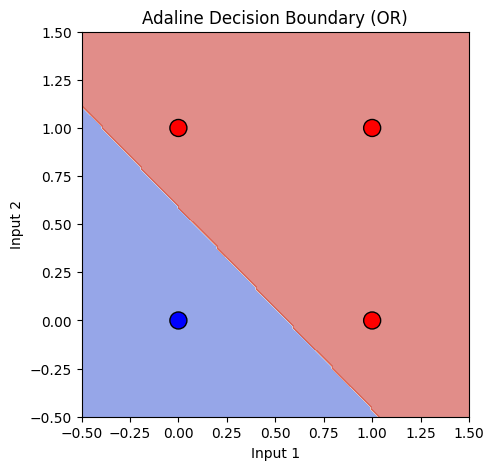

In [ ]:
# -----------------------------
# Train on OR
# -----------------------------
adaline_or = Adaline(2)
losses_or = train_adaline(adaline_or, X, y_or, lr=0.1, epochs=50)
plot_decision_boundary(adaline_or, X, y_or, "Adaline Decision Boundary (OR)")



Epoch 0, Loss: 0.3785
Epoch 10, Loss: 0.2792
Epoch 20, Loss: 0.2605
Epoch 30, Loss: 0.2538
Epoch 40, Loss: 0.2514


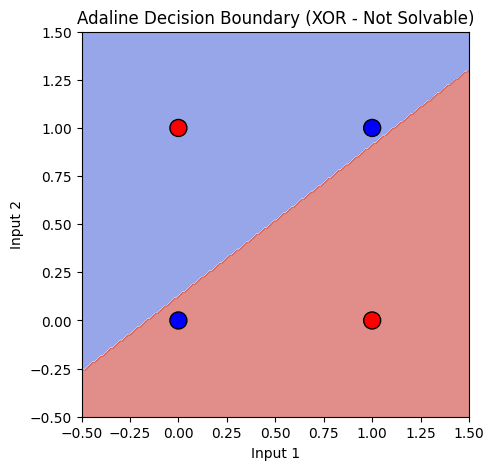

In [ ]:
# -----------------------------
# Train on XOR (Fails)
# -----------------------------
adaline_xor = Adaline(2)
losses_xor = train_adaline(adaline_xor, X, y_xor, lr=0.1, epochs=50)
plot_decision_boundary(adaline_xor, X, y_xor, "Adaline Decision Boundary (XOR - Not Solvable)")



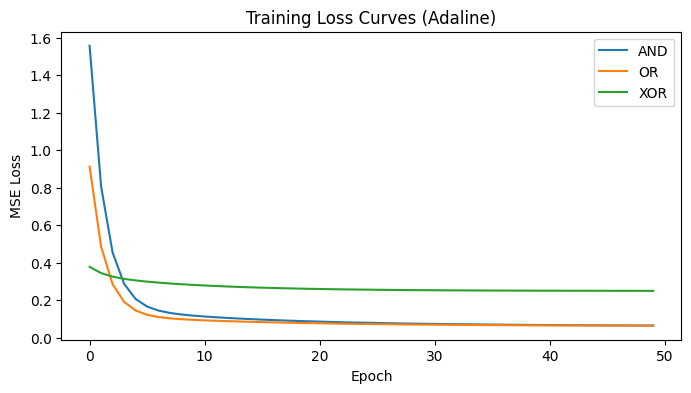

In [ ]:
# -----------------------------
# Plot Loss Curves
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(losses_and, label="AND")
plt.plot(losses_or, label="OR")
plt.plot(losses_xor, label="XOR")
plt.title("Training Loss Curves (Adaline)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

In [ ]:
# ===========================================================
# PyTorch Lab: Perceptron (1958) vs Adaline (1960)
# -----------------------------------------------------------
# Perceptron: binary step output, limited to linearly separable problems.
# Adaline: continuous output, gradient descent (LMS rule).
# Goal: Compare their performance on AND, OR, XOR gates.
# ===========================================================

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -----------------------------
# Dataset: Logic Gates
# -----------------------------
X = torch.tensor([[0.,0.],
                  [0.,1.],
                  [1.,0.],
                  [1.,1.]])
y_and = torch.tensor([[0.],[0.],[0.],[1.]])
y_or  = torch.tensor([[0.],[1.],[1.],[1.]])
y_xor = torch.tensor([[0.],[1.],[1.],[0.]])

datasets = {"AND": y_and, "OR": y_or, "XOR": y_xor}

# -----------------------------
# Perceptron Model
# -----------------------------
class Perceptron(nn.Module):
    def __init__(self, n_inputs):
        super().__init__()
        self.linear = nn.Linear(n_inputs, 1, bias=True)
    def forward(self, x):
        return torch.where(self.linear(x) >= 0, 1.0, 0.0)  # step function

# -----------------------------
# Adaline Model
# -----------------------------
class Adaline(nn.Module):
    def __init__(self, n_inputs):
        super().__init__()
        self.linear = nn.Linear(n_inputs, 1, bias=True)
    def forward(self, x):
        return self.linear(x)  # continuous output

# -----------------------------
# Training Functions
# -----------------------------
def train_perceptron(model, X, y, lr=0.1, epochs=30):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        # use MSE on linear output for stability
        outputs = model.linear(X)
        loss = ((torch.sigmoid(outputs) - y)**2).mean()
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

def train_adaline(model, X, y, lr=0.1, epochs=50):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        outputs = model(X)
        loss = criterion(outputs, y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

In [ ]:
# -----------------------------
# Visualization: Decision Boundary
# -----------------------------
def plot_decision_boundary(model, X, y, title, use_step=True):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 200),
                            torch.linspace(y_min, y_max, 200), indexing="ij")
    grid = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim=1)
    with torch.no_grad():
        Z = model(grid)
        if not use_step:
            Z = torch.where(Z >= 0.5, 1.0, 0.0)
        Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y.view(-1).numpy(), cmap="bwr", edgecolor="k", s=150)
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()


In [ ]:
# -----------------------------
# Run Experiments
# -----------------------------
results = {}

for name, target in datasets.items():
    print(f"\n=== Training on {name} Gate ===")




=== Training on AND Gate ===

=== Training on OR Gate ===

=== Training on XOR Gate ===


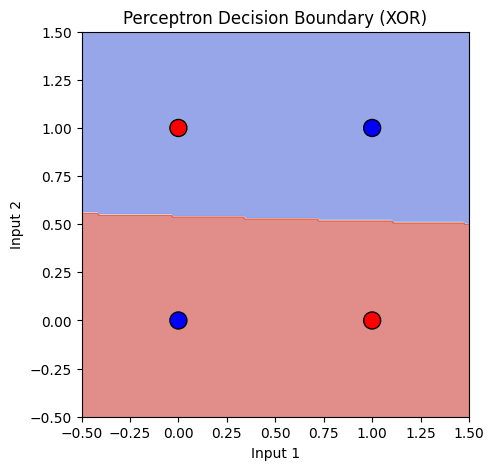

In [ ]:
    # Perceptron
    p_model = Perceptron(2)
    p_losses = train_perceptron(p_model, X, target, lr=0.1, epochs=30)
    plot_decision_boundary(p_model, X, target, f"Perceptron Decision Boundary ({name})", use_step=True)


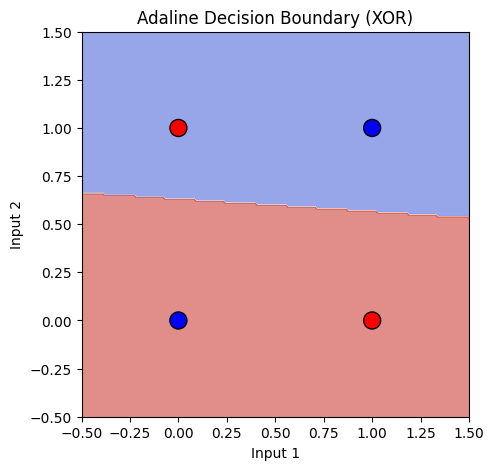

In [ ]:
    # Adaline
    a_model = Adaline(2)
    a_losses = train_adaline(a_model, X, target, lr=0.1, epochs=50)
    plot_decision_boundary(a_model, X, target, f"Adaline Decision Boundary ({name})", use_step=False)

    # Save results
    results[name] = {"Perceptron": p_losses, "Adaline": a_losses}



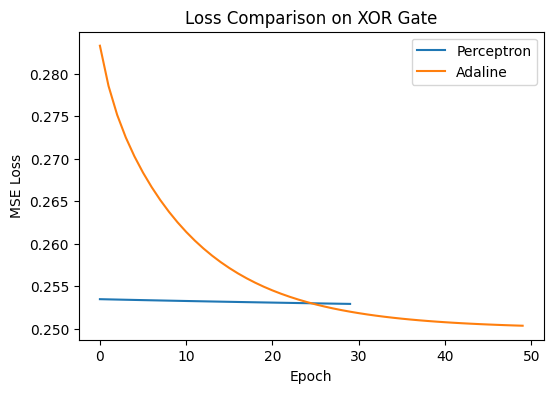

In [ ]:
# -----------------------------
# Plot Loss Curves Comparison
# -----------------------------
for name, res in results.items():
    plt.figure(figsize=(6,4))
    plt.plot(res["Perceptron"], label="Perceptron")
    plt.plot(res["Adaline"], label="Adaline")
    plt.title(f"Loss Comparison on {name} Gate")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.show()


In [14]:
# ===========================================================
# PyTorch Lab: From Perceptron → Adaline → MLP
# -----------------------------------------------------------
# Goal: Show historical lineage on XOR problem.
# Perceptron (1958): binary step unit
# Adaline (1960): continuous linear + Delta Rule
# MLP (1986): nonlinear hidden layer + backprop
# ===========================================================

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -----------------------------
# Dataset: XOR
# -----------------------------
X = torch.tensor([[0.,0.],
                  [0.,1.],
                  [1.,0.],
                  [1.,1.]])
y_xor = torch.tensor([[0.],[1.],[1.],[0.]])

# -----------------------------
# Perceptron (1958)
# -----------------------------
class Perceptron(nn.Module):
    def __init__(self, n_inputs):
        super().__init__()
        self.linear = nn.Linear(n_inputs, 1)
    def forward(self, x):
        return torch.where(self.linear(x) >= 0, 1.0, 0.0)

def train_perceptron(model, X, y, lr=0.1, epochs=30):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    for _ in range(epochs):
        outputs = model.linear(X)
        loss = ((torch.sigmoid(outputs) - y)**2).mean()
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

# -----------------------------
# Adaline (1960)
# -----------------------------
class Adaline(nn.Module):
    def __init__(self, n_inputs):
        super().__init__()
        self.linear = nn.Linear(n_inputs, 1)
    def forward(self, x):
        return self.linear(x)

def train_adaline(model, X, y, lr=0.1, epochs=50):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    for _ in range(epochs):
        outputs = model(X)
        loss = criterion(outputs, y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

# -----------------------------
# Multi-Layer Perceptron (1986)
# -----------------------------
class MLP(nn.Module):
    def __init__(self, n_inputs=2, hidden_size=4):
        super().__init__()
        self.hidden = nn.Linear(n_inputs, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.act = nn.Sigmoid()
    def forward(self, x):
        h = torch.relu(self.hidden(x))
        return self.act(self.output(h))

def train_mlp(model, X, y, lr=0.1, epochs=2000):
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    for _ in range(epochs):
        outputs = model(X)
        loss = criterion(outputs, y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

In [15]:
# -----------------------------
# Visualization: Decision Boundary
# -----------------------------
def plot_decision_boundary(model, X, y, title, step=False):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 200),
                            torch.linspace(y_min, y_max, 200), indexing="ij")
    grid = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim=1)
    with torch.no_grad():
        Z = model(grid)
        if step:  # for Perceptron
            Z = torch.where(Z >= 0.5, 1.0, 0.0)
        else:     # for Adaline & MLP
            Z = torch.where(Z >= 0.5, 1.0, 0.0)
        Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y.view(-1).numpy(), cmap="bwr", edgecolor="k", s=150)
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

=== Perceptron (1958) on XOR ===


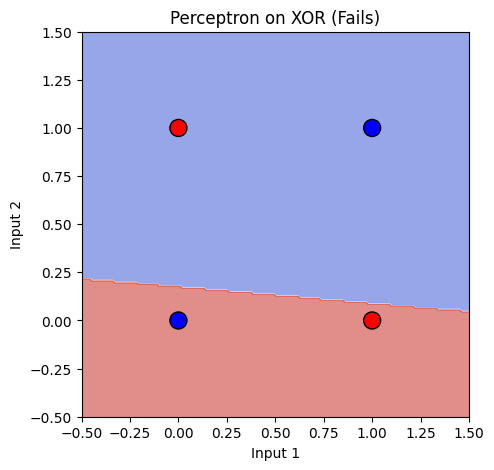

=== Adaline (1960) on XOR ===


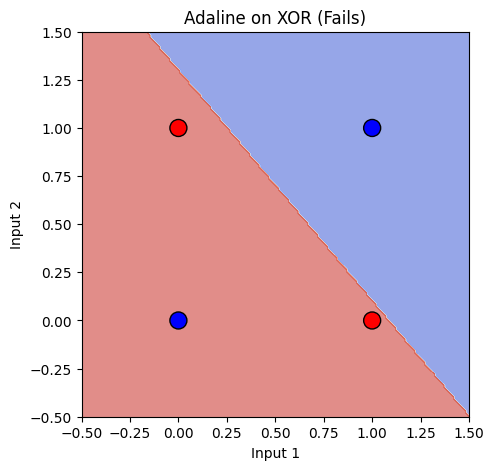

=== MLP (1986) on XOR ===


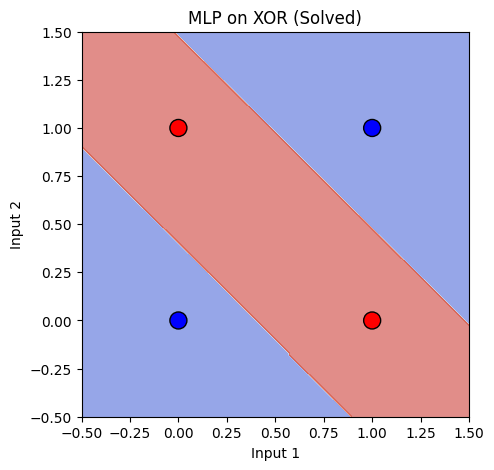

In [16]:
# -----------------------------
# Run All Models on XOR
# -----------------------------
print("=== Perceptron (1958) on XOR ===")
p_model = Perceptron(2)
p_losses = train_perceptron(p_model, X, y_xor, epochs=30)
plot_decision_boundary(p_model, X, y_xor, "Perceptron on XOR (Fails)", step=True)

print("=== Adaline (1960) on XOR ===")
a_model = Adaline(2)
a_losses = train_adaline(a_model, X, y_xor, epochs=50)
plot_decision_boundary(a_model, X, y_xor, "Adaline on XOR (Fails)", step=False)

print("=== MLP (1986) on XOR ===")
mlp = MLP()
mlp_losses = train_mlp(mlp, X, y_xor, epochs=2000)
plot_decision_boundary(mlp, X, y_xor, "MLP on XOR (Solved)", step=False)



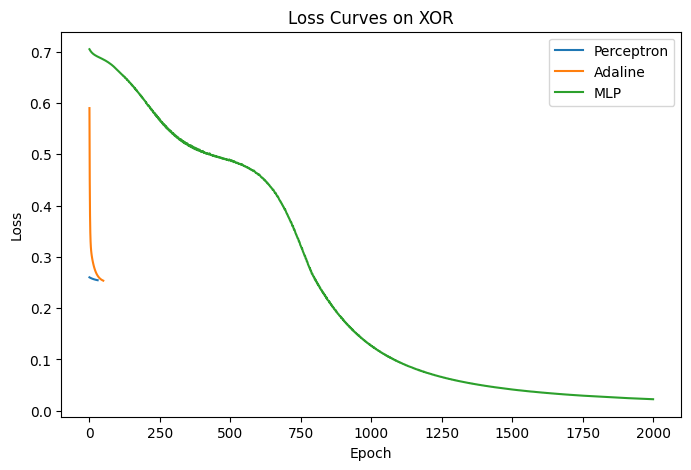

In [17]:
# -----------------------------
# Loss Curves
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(p_losses, label="Perceptron")
plt.plot(a_losses, label="Adaline")
plt.plot(mlp_losses, label="MLP")
plt.title("Loss Curves on XOR")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [18]:
# -----------------------------
# Predictions
# -----------------------------
with torch.no_grad():
    print("\nPredictions on XOR:")
    print("Perceptron:", p_model(X).view(-1).numpy())
    print("Adaline   :", torch.where(a_model(X) >= 0.5, 1.0, 0.0).view(-1).numpy())
    print("MLP       :", mlp(X).round().view(-1).numpy())



Predictions on XOR:
Perceptron: [1. 0. 1. 0.]
Adaline   : [1. 1. 1. 0.]
MLP       : [0. 1. 1. 0.]
